# Домашнее задание 2

Выполните следующие задания. Полученный после заполнения вашим кодом файл присылайте на почту kurnosovartem@gmail.com, следуя тем же правилам, что в первом задании.

In [21]:
import networkx as nx

### Задание 1
Построив соответствующую сеть и решив для неё задачу о максимальном потоке любым из [имеющихся в networkx алгоритмов](https://networkx.org/documentation/stable/reference/algorithms/flow.html), найдите паросочетание максимального размера в заданном неориентированном двудольном графе $G$ ниже. Убедитесь, что Ваш код проходит тест ниже.

In [22]:
k = 5
n = 20
G = nx.DiGraph()
G.add_nodes_from(range(2*n))
G.add_edges_from(
    (a, b + n, {'capacity': 1.0}) 
    for a,b in nx.random_regular_graph(k, n, 2020).edges()
)
# Построенный выше тестовый граф G — двудольный
# с номерами вершин в одной доле от 0 до n-1
# и в другой доле от n до 2*n-1


In [23]:
G.edges()

OutEdgeView([(0, 36), (1, 35), (1, 28), (1, 34), (2, 28), (2, 37), (2, 30), (2, 39), (2, 38), (3, 24), (3, 33), (3, 21), (3, 29), (3, 32), (4, 32), (4, 20), (4, 27), (4, 21), (5, 27), (5, 35), (5, 34), (5, 37), (6, 31), (6, 36), (6, 39), (6, 29), (7, 30), (7, 39), (7, 38), (8, 26), (8, 37), (8, 36), (9, 20), (10, 29), (10, 39), (11, 30), (11, 36), (11, 38), (12, 35), (12, 25), (12, 20), (13, 34), (13, 29), (13, 31), (13, 39), (14, 38), (14, 37), (15, 36), (17, 35), (18, 20)])

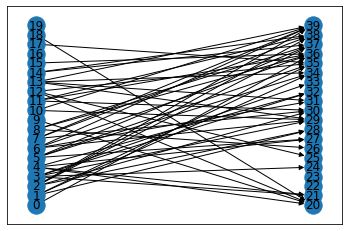

In [24]:
nx.draw_networkx(
    G,
    pos = nx.drawing.layout.bipartite_layout(G, range(20)), 
    with_labels=True)

In [25]:
G.add_edges_from(
    ("s", i, {'capacity': 1.0}) for i in range(20)
)

G.add_edges_from(
    ( i, 't', {'capacity': 1.0}) for i in range(20, 40)
)

In [26]:
from networkx.algorithms.flow import  edmonds_karp
R = edmonds_karp(G, 's', 't')
flow_value = R.graph['flow_value']
R

In [27]:
nx.maximum_flow(G, 's', 't')

(16.0,
 {0: {36: 1.0},
  1: {35: 0, 28: 1.0, 34: 0},
  2: {28: 0, 37: 1.0, 30: 0, 39: 0, 38: 0},
  3: {24: 1.0, 33: 0, 21: 0, 29: 0, 32: 0},
  4: {32: 1.0, 20: 0, 27: 0, 21: 0},
  5: {27: 1.0, 35: 0, 34: 0, 37: 0},
  6: {31: 1.0, 36: 0, 39: 0, 29: 0},
  7: {30: 0, 39: 1.0, 38: 0},
  8: {26: 1.0, 37: 0, 36: 0},
  9: {20: 1.0},
  10: {29: 1.0, 39: 0},
  11: {30: 1.0, 36: 0, 38: 0},
  12: {35: 0, 25: 1.0, 20: 0},
  13: {34: 1.0, 29: 0, 31: 0, 39: 0},
  14: {38: 1.0, 37: 0},
  15: {36: 0},
  16: {},
  17: {35: 1.0},
  18: {20: 0},
  19: {},
  20: {'t': 1.0},
  21: {'t': 0},
  22: {'t': 0},
  23: {'t': 0},
  24: {'t': 1.0},
  25: {'t': 1.0},
  26: {'t': 1.0},
  27: {'t': 1.0},
  28: {'t': 1.0},
  29: {'t': 1.0},
  30: {'t': 1.0},
  31: {'t': 1.0},
  32: {'t': 1.0},
  33: {'t': 0},
  34: {'t': 1.0},
  35: {'t': 1.0},
  36: {'t': 1.0},
  37: {'t': 1.0},
  38: {'t': 1.0},
  39: {'t': 1.0},
  's': {0: 1.0,
   1: 1.0,
   2: 1.0,
   3: 1.0,
   4: 1.0,
   5: 1.0,
   6: 1.0,
   7: 1.0,
   8: 1.0,
 

Ответ 16

In [28]:
val, flow = nx.maximum_flow(G, 's', 't')

In [29]:
# В переменную M сохраните множество рёбер 
# наибольшего паросочетания в графе G
# Ребро — это tuple или set или frozenset,
# содержащее соответствующую пару вершин
M = set()
for i, item in flow.items():
  for j, val_ in item.items():
    if val_ > 0 and i != "s" and j != "t":
      M.add((i, j))

# Ваш код тут.

In [30]:
M

{(0, 36),
 (1, 28),
 (2, 37),
 (3, 24),
 (4, 32),
 (5, 27),
 (6, 31),
 (7, 39),
 (8, 26),
 (9, 20),
 (10, 29),
 (11, 30),
 (12, 25),
 (13, 34),
 (14, 38),
 (17, 35)}

In [31]:
# Это простая проверка того, что M образует паросочетание,
# и что его размер совпадает с эталонным
from functools import reduce
print(1 == len({
    2*len(M),
    len(reduce(lambda e1, e2: set(e1) | set(e2), M)),
    len(nx.bipartite.maximum_matching(G, range(n)))
}))

True


### Задание 2
Построив соответствующую сеть и решив для неё задачу о максимальном потоке, найдите максимально возможное количество не пересекающихся по внутренним **вершинам** путей между вершинами $s$ и $t$ в заданном неориентированном графе $G$. Убедитесь, что Ваш код проходит тест ниже.

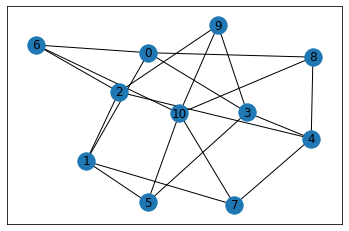

In [32]:
G = nx.mycielski_graph(4)
nx.draw_networkx(
    G)

In [33]:
s=1
t=3
nx.node_connectivity(G, s, t)

4

In [34]:
# G = nx.mycielski_graph(4)
G1 = nx.Graph()
G1.add_edges_from(
    (a, b, {'capacity': 1.0}) 
    for a,b in G.edges()
)
nx.minimum_cut_value(G1, s, t)

4.0

In [35]:
def num_disjoint_paths(G, s, t):
    G1 = nx.Graph()
    G1.add_edges_from(
        (a, b, {'capacity': 1.0}) 
        for a,b in G.edges()
    )
    return nx.minimum_cut_value(G1, s, t)

In [36]:
# Простой тест, он должен проходиться при запуске непосредственно после предыдущей ячейки
G = nx.mycielski_graph(10)
s = 7
t = 700
print(
    num_disjoint_paths(G, s, t) 
    == 
    nx.node_connectivity(G, s, t)
)

True


### Задание 3
Построив поток в соответствующей сети, выберите из данного множества задач `tasks` такое подмножество, суммарная выгода выполнения задач которого максимальна. 

Словарь `prerequisites` содержит для каждой задачи перечень других задач, которые требуется решить перед началом её выполнения (если таковые есть). 

Словарь `profit` содержит информацию о выгоде решения каждой из задач. Выгоды — целочисленные, могут быть как положительные, так и отрицательные, и нулевые.

Также задано множество `compulsory` задач, которые нужно решить в обязательном порядке. Подумайте, и опишите в комментириях, как с минимальными усилиями интегрировать это в рассказанный на лекции алгоритм. Убедитесь, что Ваш код проходит тест ниже.

In [37]:
# Ниже приведён алгоритм решения задачи полным перебором,
# результат работы которого можно считать эталонным
from itertools import combinations

def brute_force_selection(tasks, prerequisites, profit, compulsory):
    best_profit = 0
    best_selection = set()
    for ss in range(1, len(tasks)):
        for c in combinations(tasks, ss):
            if any(t not in c for t in compulsory):
                continue
            for t in c:
                if t in prerequisites:
                    for p in prerequisites[t]:
                        if p not in c:
                            break
                    else:
                        continue
                    break
            else:
                current_profit = sum(profit[t] for t in c)
                if current_profit > best_profit:
                    best_profit = current_profit
                    best_selection = set(c)
    return best_selection

In [81]:
import random
random.seed(2020)

tasks = set(range(1, 22))

ranges = [
    (1, len(tasks) // 3), 
    (len(tasks) // 3, 2 * len(tasks) // 3), 
    (2 * len(tasks) // 3, len(tasks))
]

prerequisites = {}
for ri, r in enumerate(ranges):
    if ri == 0:
        continue
    for t in range(*r):
        if random.randrange(1000)/1000 < 0.4:
            prerequisites[t] = set(random.sample(range(*ranges[ri-1]), 4))

profit = {
    task: random.randrange(-7, 15)
    for task in tasks
}

compulsory = set(random.sample(tasks, 2))
brute_force_selection(tasks, prerequisites, profit, compulsory)

{2, 4, 5, 6, 7, 8, 9, 13, 15, 16, 18, 19, 20, 21}

In [89]:
def flow_based_selection(tasks, prerequisites, profit, compulsory):
    G = nx.DiGraph()
    G.add_nodes_from(tasks)
    G.add_nodes_from(["s", "t"])
    capacity = {}
    max_profit = sum(p for p in profit.values() if p > 0)

    for u in prerequisites:
      for v in prerequisites[u]:
        G.add_edge(u, v, capacity = (max_profit+1)*len(tasks))
        capacity[(u, v)] = (max_profit+1)*len(tasks)

    for task, p in profit.items():
      if task  in compulsory:
        G.add_edge("s", task,capacity=max_profit+1)
        capacity[("s", task)] = max_profit+1
      elif p <= 0:
        G.add_edge(task, "t", capacity=-p)
        capacity[(task, "t" )] = -p
      else:
        G.add_edge("s", task,capacity=p)
        capacity[("s", task)] = p

    flow = nx.maximum_flow(G, "s", "t")
    reachable_from_s_all = {"s"}
    reachable_from_s_new = {"s"}
    reachable_from_s_next = set()

    # print(flow)

    while True:
      for u in reachable_from_s_new:
        for v, f in flow[1][u].items():
          if f < capacity[(u, v)] and v not in reachable_from_s_all:
            reachable_from_s_all.add(v)
            reachable_from_s_next.add(v)
            reachable_from_s_all.add(v)
      reachable_from_s_new = set(reachable_from_s_next)
      reachable_from_s_next = set()
      if reachable_from_s_new  == set():
        break
    selected = (reachable_from_s_all-set("s"))
    return selected



In [91]:
import random
random.seed(2020)

tasks = set(range(1, 22))

ranges = [
    (1, len(tasks) // 3), 
    (len(tasks) // 3, 2 * len(tasks) // 3), 
    (2 * len(tasks) // 3, len(tasks))
]

prerequisites = {}
for ri, r in enumerate(ranges):
    if ri == 0:
        continue
    for t in range(*r):
        if random.randrange(1000)/1000 < 0.4:
            prerequisites[t] = set(random.sample(range(*ranges[ri-1]), 4))

profit = {
    task: random.randrange(-7, 15)
    for task in tasks
}

compulsory = set(random.sample(tasks, 2))
flow_based_selection(tasks, prerequisites, profit, compulsory)

{2, 4, 5, 6, 7, 8, 9, 13, 15, 16, 18, 19, 20, 21}

In [90]:
# Простой тест, он должен проходиться при запуске непосредственно после выполнения предыдущей ячейки
import random
random.seed(2020)

tasks = set(range(1, 22))

ranges = [
    (1, len(tasks) // 3), 
    (len(tasks) // 3, 2 * len(tasks) // 3), 
    (2 * len(tasks) // 3, len(tasks))
]

prerequisites = {}
for ri, r in enumerate(ranges):
    if ri == 0:
        continue
    for t in range(*r):
        if random.randrange(1000)/1000 < 0.4:
            prerequisites[t] = set(random.sample(range(*ranges[ri-1]), 4))

profit = {
    task: random.randrange(-7, 15)
    for task in tasks
}

compulsory = set(random.sample(tasks, 2))

print(1 == len(set(
    sum(map(profit.get, 
        method(
            tasks, 
            prerequisites, 
            profit, 
            compulsory
        )
    ))
    for method in [
        brute_force_selection, 
        flow_based_selection
    ]
)))

True
